In [1]:
import sys
sys.path.append('../')
print(sys.executable)

# this prevents the need to restart the kernel every time a local module is changed
%load_ext autoreload
%autoreload 2

/data/sguotong/micromamba/envs/cage/bin/python


In [2]:
from include.bessel import initialize_bessel_table, BesselJZeros, BesselJpZeros
initialize_bessel_table(10, 10)

# print out a table of BesselJZeros
print("BesselJZeros (m,n): \n")
print("k |  J_0(x) |  J_1(x) |  J_2(x) |  J_3(x) |  J_4(x) |  J_5(x) |\n")
for n in range(1, 6):
    str_out = f"{n} |"
    for m in range(0, 6):
        str_out += f" {BesselJZeros(m, n):.5f} |"

    print(str_out)

print("\n https://mathworld.wolfram.com/BesselFunctionZeros.html")

BesselJZeros (m,n): 

k |  J_0(x) |  J_1(x) |  J_2(x) |  J_3(x) |  J_4(x) |  J_5(x) |

1 | 2.40483 | 3.83171 | 5.13562 | 6.38016 | 7.58834 | 8.77148 |
2 | 5.52008 | 7.01559 | 8.41724 | 9.76102 | 11.06471 | 12.33860 |
3 | 8.65373 | 10.17347 | 11.61984 | 13.01520 | 14.37254 | 15.70017 |
4 | 11.79153 | 13.32369 | 14.79595 | 16.22347 | 17.61597 | 18.98013 |
5 | 14.93092 | 16.47063 | 17.95982 | 19.40942 | 20.82693 | 22.21780 |

 https://mathworld.wolfram.com/BesselFunctionZeros.html


/tmp/ipykernel_1102896/4071169685.py:26: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('tab10')


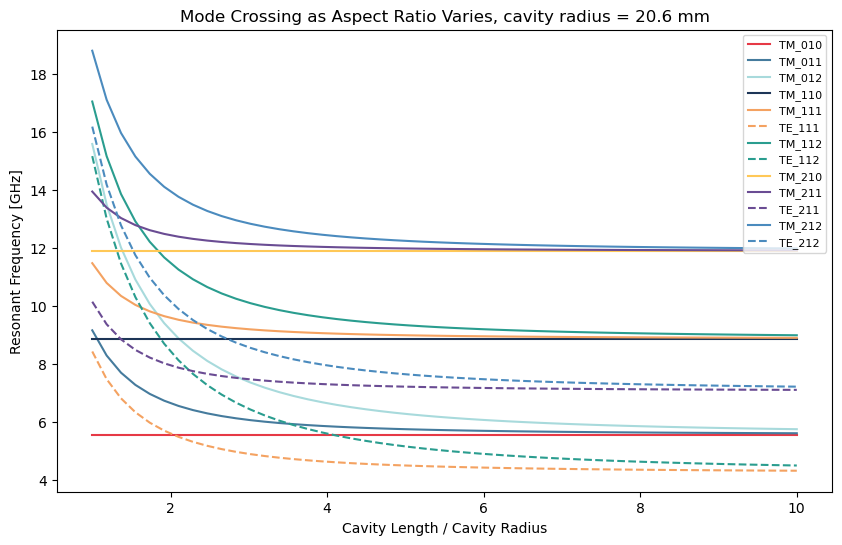

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from include.cavity_modes import *
from include.custom_types import *

a = 0.0206          # cavity radius [m]
L_arr = np.linspace(a, 10*a, 50)
m_max, n_max, p_max = 3, 2, 3

f_list = []
for m in range(0, m_max):
    for n in range(1, n_max):
        for p in range(0, p_max):
            f_tm = f_mnp(a, L_arr, "TM", m, n, p)
            f_list.append((f"TM_{m}{n}{p}", f_tm))
            if m == 0 or p == 0:
                continue
            f_te = f_mnp(a, L_arr, "TE", m, n, p)
            f_list.append((f"TE_{m}{n}{p}", f_te))

fig, ax = plt.subplots(figsize=(10, 6))
try:
    # Get the colormap object
    cmap = cm.get_cmap('tab10')
    # Extract the colors (returns RGBA tuples, convert to hex for better debugging print)
    DISTINCT_COLORS = [
        plt.colors.rgb2hex(cmap(i)) for i in range(cmap.N)
    ]
except AttributeError:
    # Fallback for older Matplotlib versions or missing colormap
    print("Warning: 'tab10' colormap not found or accessible. Using default hardcoded colors.")
    DISTINCT_COLORS = [
        '#E63946', '#457B9D', '#A8DADC', '#1D3557', 
        '#F4A261', '#2A9D8F', '#FFC857', '#6A4C93',
        '#4B8BBE'
    ]

def generate_index_color_map(m_max, n_max, p_max, colors):
    """
    Generates a dictionary mapping (m, n, p) tuples to unique colors.        
    Returns:
        dict: A map where keys are (m, n, p) tuples and values are color codes.
    """
    unique_indices = []
    # Loop from 1 up to and including the max index
    for m in range(0, m_max):
        for n in range(1, n_max):
            for p in range(0, p_max):
                unique_indices.append((m, n, p))
                
    index_map = {}
    color_count = len(colors)
    
    for i, indices in enumerate(unique_indices):
        # Assign color by cycling through the provided list
        color = colors[i % color_count]
        index_map[indices] = color
        
        if i == color_count:
            # Print a warning only once when the cycle starts repeating
            print(f"Warning: Color cycle started repeating at index {indices}. Consider adding more colors to DISTINCT_COLORS.")
            
    return index_map

index_color_map = generate_index_color_map(m_max, n_max, p_max, DISTINCT_COLORS)
for mode, f in f_list:
    fam = mode.split("_")[0]
    m, n, p = [int(x) for x in mode.split("_")[1]]
    if fam == "TE":
        linestyle = "--"
    else:
        linestyle = "-"
    color = index_color_map.get((m, n, p), "#000000")  # Default to black if not found
    ax.plot(L_arr/a, f, label=mode, linestyle=linestyle, color=color)
ax.set_xlabel("Cavity Length / Cavity Radius")
ax.set_ylabel("Resonant Frequency [GHz]")
ax.set_title("Mode Crossing as Aspect Ratio Varies, cavity radius = 20.6 mm")
ax.legend(loc="upper right", fontsize=8)